# Laboratory values vs outcome

Get the first laboratory measurements for patients admitted to the ICU. Plot the distribution of measurements for survival and non-survival groups.

In [45]:
# Import libraries
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yaml

# used to print out pretty pandas dataframes
from IPython.display import display, HTML

%matplotlib inline
plt.style.use('ggplot') 

# Load in merged GOSSIS data

In [47]:
df = pd.read_csv('gosiss-data.csv',header=0,sep=",")

# Load in the header and the data type for each column

In [48]:
hdr = pd.read_csv('hdr/header.csv',header=None,sep=',')[0].values

# load yaml definitions
with open("hdr/variable-definitions.yaml", 'r') as stream:
    try:
        varlist = yaml.load(stream)
    except yaml.YAMLError as exc:
        print(exc)

# convert to dataframe
df_var = pd.DataFrame.from_dict(varlist, orient='index')
df_var['varname'] = df_var.index

# specify the order of the categories - data is output in this order
category_order = {'identifier': 1,
                  'demographic': 2,
                  'APACHE covariate': 3,
                  'vitals': 4,
                  'labs': 5,
                  'labs blood gas': 6,
                  'APACHE prediction': 10}
df_var['category_order'] = df_var['category'].map(category_order)

# sort df by the category, then by the variable name
df_var.sort_values(['category_order','varname'],inplace=True)

In [49]:
df_var['category'].value_counts()

vitals               64
labs                 60
demographic          27
APACHE covariate     25
labs blood gas       16
identifier            4
APACHE prediction     4
Name: category, dtype: int64

In [50]:
df_var['dataType'].value_counts()

numeric    167
string      14
binary      11
integer      8
Name: dataType, dtype: int64

# Comparisons

For comparisons, we are interested assessing each variable across the databases.

For numeric/integer variables:

* Compare the mean, median, standard deviation, 5th and 95th percentiles
* Plot the distribution using histograms

For string/binary (categorical) variables:

* Compare the categories to see if they overlap
* Compare the frequency of each category (cross-tab)

## Compare readmissions

In [60]:
fac_list = ['elective_surgery','gender','hospital_death','icu_death','pregnant','readmission_status','smoking_status',
           'gcs_unable_apache','gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache','intubated_apache','ventilated_apache',
           'country','ethnicity','hospital_admit_source','hospital_disch_location','icu_admit_source',
           'icu_admit_type','icu_disch_location','icu_stay_type','icu_type','hospital_bed_size']

#bed size on eicu is a factor, but not the others

for a in fac_list:
    tbl = pd.crosstab(df[a], df['data_source'], margins = True)
    display(HTML(tbl.to_html().replace('NaN', '')))
    #get percentage table
    tbl_perc = tbl/tbl.xs('All', axis=0)
    display(HTML(tbl_perc.to_html()))

data_source,anzics,eicu,mimic,orchestra,All
elective_surgery,,,,,
0.0,174129,3551,41730,43041,262451
1.0,129174,29705,6930,16652,182461
All,303303,33256,48660,59693,444912


data_source,anzics,eicu,mimic,orchestra,All
elective_surgery,,,,,
0.0,0.574109,0.106778,0.857583,0.721039,0.589894
1.0,0.425891,0.893222,0.142417,0.278961,0.410106
All,1.000000,1.000000,1.000000,1.000000,1.000000


data_source,anzics,eicu,mimic,orchestra,All
gender,,,,,
,0,0,0,3,3
F,129280,0,21316,29911,180507
Female,0,92303,0,0,92303
I,0,0,0,2,2
M,174507,0,27344,29773,231624
Male,0,108379,0,0,108379
Other,0,8,0,0,8
Unknown,0,35,0,0,35
All,303787,200725,48660,59689,612861


data_source,anzics,eicu,mimic,orchestra,All
gender,,,,,
,0.000000,0.000000,0.00000,0.000050,0.000005
F,0.425561,0.000000,0.43806,0.501114,0.294532
Female,0.000000,0.459848,0.00000,0.000000,0.150610
I,0.000000,0.000000,0.00000,0.000034,0.000003
M,0.574439,0.000000,0.56194,0.498802,0.377939
Male,0.000000,0.539938,0.00000,0.000000,0.176841
Other,0.000000,0.000040,0.00000,0.000000,0.000013
Unknown,0.000000,0.000174,0.00000,0.000000,0.000057
All,1.000000,1.000000,1.00000,1.000000,1.000000


data_source,anzics,eicu,mimic,orchestra,All
hospital_death,,,,,
0.0,273929,0,43217,51112,368258
1.0,25542,0,5443,8581,39566
0.0,3604,0,0,0,3604
1.0,334,0,0,0,334
Alive,0,181104,0,0,181104
Expired,0,18004,0,0,18004
All,303409,199108,48660,59693,610870


data_source,anzics,eicu,mimic,orchestra,All
hospital_death,,,,,
0.0,0.902837,0.000000,0.888142,0.856248,0.602842
1.0,0.084183,0.000000,0.111858,0.143752,0.064770
0.0,0.011878,0.000000,0.000000,0.000000,0.005900
1.0,0.001101,0.000000,0.000000,0.000000,0.000547
Alive,0.000000,0.909577,0.000000,0.000000,0.296469
Expired,0.000000,0.090423,0.000000,0.000000,0.029473
All,1.000000,1.000000,1.000000,1.000000,1.000000


data_source,anzics,eicu,mimic,orchestra,All
icu_death,,,,,
0.0,286800,189918,44903,53970,575591
1.0,16276,10907,3757,5722,36662
All,303076,200825,48660,59692,612253


data_source,anzics,eicu,mimic,orchestra,All
icu_death,,,,,
0.0,0.946297,0.945689,0.922791,0.904141,0.94012
1.0,0.053703,0.054311,0.077209,0.095859,0.05988
All,1.000000,1.000000,1.000000,1.000000,1.00000


data_source,anzics,mimic,All
pregnant,,,
0.0,0,2684,2684
1.0,749,28,777
2.0,43168,0,43168
3.0,2615,0,2615
All,46532,2712,49244


data_source,anzics,mimic,All
pregnant,,,
0.0,0.000000,0.989676,0.054504
1.0,0.016096,0.010324,0.015779
2.0,0.927706,0.000000,0.876614
3.0,0.056198,0.000000,0.053103
All,1.000000,1.000000,1.000000


data_source,anzics,eicu,mimic,orchestra,All
readmission_status,,,,,
0.0,289221,161020,48580,59693,558514
1.0,14591,10157,80,0,24828
All,303812,171177,48660,59693,583342


data_source,anzics,eicu,mimic,orchestra,All
readmission_status,,,,,
0.0,0.951974,0.940664,0.998356,1.0,0.957438
1.0,0.048026,0.059336,0.001644,0.0,0.042562
All,1.000000,1.000000,1.000000,1.0,1.000000


data_source,anzics,mimic,All
smoking_status,,,
0.0,0,247,247
2.0,0,79,79
0.0,0,19,19
2.0,0,3,3
Current Smoker,20164,0,20164
Ex-Smoker,34346,0,34346
Never Smoked,32101,0,32101
All,86611,348,86959


data_source,anzics,mimic,All
smoking_status,,,
0.0,0.000000,0.709770,0.002840
2.0,0.000000,0.227011,0.000908
0.0,0.000000,0.054598,0.000218
2.0,0.000000,0.008621,0.000034
Current Smoker,0.232811,0.000000,0.231879
Ex-Smoker,0.396555,0.000000,0.394968
Never Smoked,0.370634,0.000000,0.369151
All,1.000000,1.000000,1.000000


data_source,eicu,mimic,All
gcs_unable_apache,,,
-1.0,3729,0,3729
0.0,165652,37506,203158
1.0,1796,10996,12792
All,171177,48502,219679


data_source,eicu,mimic,All
gcs_unable_apache,,,
-1.0,0.021784,0.000000,0.016975
0.0,0.967723,0.773288,0.924795
1.0,0.010492,0.226712,0.058230
All,1.000000,1.000000,1.000000


data_source,anzics,eicu,mimic,All
gcs_eyes_apache,,,,
-1.0,0,5525,0,5525
1.0,22576,14421,7015,44012
2.0,6745,8271,2658,17674
3.0,32707,24483,12666,69856
4.0,226351,118477,26071,370899
All,288379,171177,48410,507966


data_source,anzics,eicu,mimic,All
gcs_eyes_apache,,,,
-1.0,0.000000,0.032277,0.000000,0.010877
1.0,0.078286,0.084246,0.144908,0.086644
2.0,0.023389,0.048318,0.054906,0.034794
3.0,0.113417,0.143027,0.261640,0.137521
4.0,0.784908,0.692132,0.538546,0.730165
All,1.000000,1.000000,1.000000,1.000000


data_source,anzics,eicu,mimic,All
gcs_motor_apache,,,,
-1.0,0,5525,0,5525
1.0,17089,9691,4455,31235
2.0,1329,640,209,2178
3.0,1785,1038,245,3068
4.0,5381,8639,2432,16452
5.0,12604,14286,5349,32239
6.0,250214,131358,35528,417100
All,288402,171177,48218,507797


data_source,anzics,eicu,mimic,All
gcs_motor_apache,,,,
-1.0,0.000000,0.032277,0.000000,0.010880
1.0,0.059254,0.056614,0.092393,0.061511
2.0,0.004608,0.003739,0.004334,0.004289
3.0,0.006189,0.006064,0.005081,0.006042
4.0,0.018658,0.050468,0.050438,0.032399
5.0,0.043703,0.083457,0.110934,0.063488
6.0,0.867588,0.767381,0.736820,0.821391
All,1.000000,1.000000,1.000000,1.000000


data_source,anzics,eicu,mimic,All
gcs_verbal_apache,,,,
-1.0,0,5525,0,5525
0.0,0,0,11035,11035
1.0,27135,29599,4071,60805
2.0,6838,3709,1419,11966
3.0,6810,5582,487,12879
4.0,24395,21189,5686,51270
5.0,223195,105573,25534,354302
All,288373,171177,48232,507782


data_source,anzics,eicu,mimic,All
gcs_verbal_apache,,,,
-1.0,0.000000,0.032277,0.000000,0.010881
0.0,0.000000,0.000000,0.228790,0.021732
1.0,0.094097,0.172915,0.084405,0.119746
2.0,0.023712,0.021668,0.029420,0.023565
3.0,0.023615,0.032610,0.010097,0.025363
4.0,0.084595,0.123784,0.117889,0.100969
5.0,0.773980,0.616748,0.529400,0.697744
All,1.000000,1.000000,1.000000,1.000000


data_source,anzics,eicu,All
intubated_apache,,,
0.0,200491,145779,346270
1.0,103319,25398,128717
All,303810,171177,474987


data_source,anzics,eicu,All
intubated_apache,,,
0.0,0.659922,0.851627,0.729009
1.0,0.340078,0.148373,0.270991
All,1.000000,1.000000,1.000000


data_source,anzics,eicu,mimic,All
ventilated_apache,,,,
0.0,195292,129829,27337,352458
1.0,108519,41348,21323,171190
All,303811,171177,48660,523648


data_source,anzics,eicu,mimic,All
ventilated_apache,,,,
0.0,0.642808,0.758449,0.561796,0.673082
1.0,0.357192,0.241551,0.438204,0.326918
All,1.000000,1.000000,1.000000,1.000000


data_source,anzics,eicu,mimic,orchestra,All
country,,,,,
Australia,275078,0,0,0,275078
New Zealand,28734,0,0,0,28734
USA,0,200859,48660,0,249519
brazil,0,0,0,59693,59693
All,303812,200859,48660,59693,613024


data_source,anzics,eicu,mimic,orchestra,All
country,,,,,
Australia,0.905422,0.0,0.0,0.0,0.448723
New Zealand,0.094578,0.0,0.0,0.0,0.046873
USA,0.000000,1.0,1.0,0.0,0.407030
brazil,0.000000,0.0,0.0,1.0,0.097375
All,1.000000,1.0,1.0,1.0,1.000000


data_source,anzics,eicu,mimic,All
ethnicity,,,,
AMERICAN INDIAN/ALASKA NATIVE,0,0,22,22
AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,0,0,3,3
ASIAN,0,0,714,714
ASIAN - ASIAN INDIAN,0,0,78,78
ASIAN - CAMBODIAN,0,0,16,16
ASIAN - CHINESE,0,0,221,221
ASIAN - FILIPINO,0,0,23,23
ASIAN - JAPANESE,0,0,6,6
ASIAN - KOREAN,0,0,11,11


data_source,anzics,eicu,mimic,All
ethnicity,,,,
AMERICAN INDIAN/ALASKA NATIVE,0.0,0.000000,0.000452,0.000082
AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,0.0,0.000000,0.000062,0.000011
ASIAN,0.0,0.000000,0.014673,0.002665
ASIAN - ASIAN INDIAN,0.0,0.000000,0.001603,0.000291
ASIAN - CAMBODIAN,0.0,0.000000,0.000329,0.000060
ASIAN - CHINESE,0.0,0.000000,0.004542,0.000825
ASIAN - FILIPINO,0.0,0.000000,0.000473,0.000086
ASIAN - JAPANESE,0.0,0.000000,0.000123,0.000022
ASIAN - KOREAN,0.0,0.000000,0.000226,0.000041


data_source,anzics,eicu,mimic,All
hospital_admit_source,,,,
** INFO NOT AVAILABLE **,0,0,4,4
Acute Care/Floor,0,3685,0,3685
CLINIC REFERRAL/PREMATURE,0,0,9744,9744
Chest Pain Center,0,321,0,321
Chronic Care Hospital (including nursing homes),2259,0,0,2259
Direct Admit,0,12369,0,12369
EMERGENCY ROOM ADMIT,0,0,21963,21963
Emergency Department,0,82504,0,82504
Floor,0,18111,0,18111


data_source,anzics,eicu,mimic,All
hospital_admit_source,,,,
** INFO NOT AVAILABLE **,0.000000,0.000000,0.000082,0.000008
Acute Care/Floor,0.000000,0.024340,0.000000,0.007556
CLINIC REFERRAL/PREMATURE,0.000000,0.000000,0.200247,0.019980
Chest Pain Center,0.000000,0.002120,0.000000,0.000658
Chronic Care Hospital (including nursing homes),0.007854,0.000000,0.000000,0.004632
Direct Admit,0.000000,0.081700,0.000000,0.025363
EMERGENCY ROOM ADMIT,0.000000,0.000000,0.451356,0.045036
Emergency Department,0.000000,0.544959,0.000000,0.169177
Floor,0.000000,0.119627,0.000000,0.037137


data_source,anzics,eicu,mimic,orchestra,All
hospital_disch_location,,,,,
DEAD/EXPIRED,0,0,5443,0,5443
DISC-TRAN CANCER/CHLDRN H,0,0,576,0,576
DISC-TRAN TO FEDERAL HC,0,0,11,0,11
DISCH-TRAN TO PSYCH HOSP,0,0,438,0,438
Death,0,18004,0,0,18004
Died in Hospital,25876,0,0,8228,34104
Discharged home,215764,0,0,354,216118
HOME,0,0,12572,0,12572
HOME HEALTH CARE,0,0,12140,0,12140


data_source,anzics,eicu,mimic,orchestra,All
hospital_disch_location,,,,,
DEAD/EXPIRED,0.000000,0.000000,0.111858,0.000000,0.008954
DISC-TRAN CANCER/CHLDRN H,0.000000,0.000000,0.011837,0.000000,0.000948
DISC-TRAN TO FEDERAL HC,0.000000,0.000000,0.000226,0.000000,0.000018
DISCH-TRAN TO PSYCH HOSP,0.000000,0.000000,0.009001,0.000000,0.000721
Death,0.000000,0.090552,0.000000,0.000000,0.029618
Died in Hospital,0.085284,0.000000,0.000000,0.144404,0.056104
Discharged home,0.711132,0.000000,0.000000,0.006213,0.355531
HOME,0.000000,0.000000,0.258364,0.000000,0.020682
HOME HEALTH CARE,0.000000,0.000000,0.249486,0.000000,0.019971


data_source,anzics,eicu,orchestra,All
icu_admit_source,,,,
Accident & Emergency,79586,0,31348,110934
Acute Care/Floor,0,5604,0,5604
Chest Pain Center,0,336,0,336
Direct Admit,0,12672,0,12672
Emergency Department,0,89594,0,89594
Floor,0,24368,0,24368
Home-care,0,0,217,217
ICU,0,5439,0,5439
ICU to SDU,0,13827,0,13827


data_source,anzics,eicu,orchestra,All
icu_admit_source,,,,
Accident & Emergency,0.262119,0.000000,0.525154,0.197010
Acute Care/Floor,0.000000,0.028052,0.000000,0.009952
Chest Pain Center,0.000000,0.001682,0.000000,0.000597
Direct Admit,0.000000,0.063433,0.000000,0.022505
Emergency Department,0.000000,0.448488,0.000000,0.159112
Floor,0.000000,0.121981,0.000000,0.043276
Home-care,0.000000,0.000000,0.003635,0.000385
ICU,0.000000,0.027226,0.000000,0.009659
ICU to SDU,0.000000,0.069215,0.000000,0.024556


data_source,eicu,mimic,All
icu_admit_type,,,
CCU-CTICU,15290,0,15290
CSICU,9625,0,9625
CTICU,6158,0,6158
Cardiac ICU,12467,0,12467
ELECTIVE,0,6930,6930
EMERGENCY,0,40521,40521
MICU,17465,0,17465
Med-Surg ICU,113222,0,113222
Neuro ICU,14451,0,14451


data_source,eicu,mimic,All
icu_admit_type,,,
CCU-CTICU,0.076123,0.000000,0.061278
CSICU,0.047919,0.000000,0.038574
CTICU,0.030658,0.000000,0.024679
Cardiac ICU,0.062068,0.000000,0.049964
ELECTIVE,0.000000,0.142417,0.027773
EMERGENCY,0.000000,0.832737,0.162396
MICU,0.086952,0.000000,0.069995
Med-Surg ICU,0.563689,0.000000,0.453761
Neuro ICU,0.071946,0.000000,0.057915


data_source,anzics,eicu,mimic,orchestra,All
icu_disch_location,,,,,
Acute Care/Floor,0,20279,0,0,20279
CCU,0,0,6794,0,6794
CSRU,0,0,8610,0,8610
Death,0,10907,0,0,10907
Died in ICU,16276,0,0,5665,21941
Floor,0,93121,0,0,93121
Home,0,18880,0,0,18880
ICU,0,1274,0,0,1274
MICU,0,0,19441,0,19441


data_source,anzics,eicu,mimic,orchestra,All
icu_disch_location,,,,,
Acute Care/Floor,0.000000,0.101130,0.000000,0.000000,0.033153
CCU,0.000000,0.000000,0.139622,0.000000,0.011107
CSRU,0.000000,0.000000,0.176942,0.000000,0.014076
Death,0.000000,0.054392,0.000000,0.000000,0.017831
Died in ICU,0.053703,0.000000,0.000000,0.095338,0.035870
Floor,0.000000,0.464386,0.000000,0.000000,0.152238
Home,0.000000,0.094153,0.000000,0.000000,0.030866
ICU,0.000000,0.006353,0.000000,0.000000,0.002083
MICU,0.000000,0.000000,0.399527,0.000000,0.031783


data_source,anzics,eicu,mimic,All
icu_stay_type,,,,
CMED,0,0,5412,5412
CSURG,0,0,6815,6815
DENT,0,0,5,5
ENT,0,0,135,135
GU,0,0,236,236
GYN,0,0,127,127
HDU,78041,0,0,78041
ICU,225535,0,0,225535
MED,0,0,19039,19039


data_source,anzics,eicu,mimic,All
icu_stay_type,,,,
CMED,0.000000,0.000000,0.116950,0.009827
CSURG,0.000000,0.000000,0.147269,0.012375
DENT,0.000000,0.000000,0.000108,0.000009
ENT,0.000000,0.000000,0.002917,0.000245
GU,0.000000,0.000000,0.005100,0.000429
GYN,0.000000,0.000000,0.002744,0.000231
HDU,0.257072,0.000000,0.000000,0.141710
ICU,0.742928,0.000000,0.000000,0.409534
MED,0.000000,0.000000,0.411423,0.034572


data_source,eicu,mimic,orchestra,All
icu_type,,,,
1,0,0,45663,45663
2,0,0,4576,4576
3,0,0,1147,1147
4,0,0,1199,1199
5,0,0,3058,3058
6,0,0,325,325
1,0,0,2831,2831
5,0,0,894,894
CCU,0,7094,0,7094


data_source,eicu,mimic,orchestra,All
icu_type,,,,
1,0.000000,0.000000,0.764964,0.147675
2,0.000000,0.000000,0.076659,0.014799
3,0.000000,0.000000,0.019215,0.003709
4,0.000000,0.000000,0.020086,0.003878
5,0.000000,0.000000,0.051229,0.009890
6,0.000000,0.000000,0.005445,0.001051
1,0.000000,0.000000,0.047426,0.009156
5,0.000000,0.000000,0.014977,0.002891
CCU,0.000000,0.145787,0.000000,0.022942


data_source,eicu,orchestra,All
hospital_bed_size,,,
30,0,77,77
43,0,232,232
44,0,1252,1252
52,0,1388,1388
60,0,986,986
68,0,629,629
83,0,241,241
86,0,705,705
94,0,856,856


data_source,eicu,orchestra,All
hospital_bed_size,,,
30,0.000000,0.001290,0.000318
43,0.000000,0.003887,0.000959
44,0.000000,0.020974,0.005176
52,0.000000,0.023252,0.005738
60,0.000000,0.016518,0.004076
68,0.000000,0.010537,0.002600
83,0.000000,0.004037,0.000996
86,0.000000,0.011810,0.002915
94,0.000000,0.014340,0.003539


## Compare APACHE-III score in eicu and anzics patients

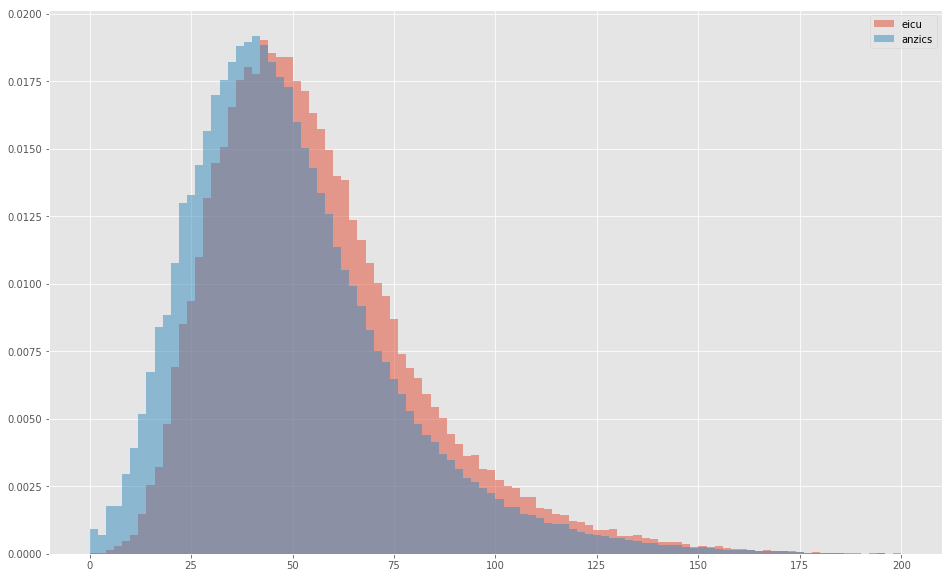

In [52]:
bins = np.linspace(0, 200, 101)
plt.figure(figsize=[16,10])
#plt.hist(df_all.loc[df_all['db']=='mimic','apsiii'].values, bins,
#         normed=True, alpha=0.5, label='mimic')
plt.hist(df.loc[df['data_source']=='eicu','apache_3j_score'].dropna().values, bins,
         normed=True, alpha=0.5, label='eicu')
plt.hist(df.loc[df['data_source']=='anzics','apache_3j_score'].dropna().values, bins,
         normed=True, alpha=0.5, label='anzics')
plt.legend(loc='upper right')
plt.show()

As we can see the distributions are very similar, though ANZICS seems to have lower acuity.

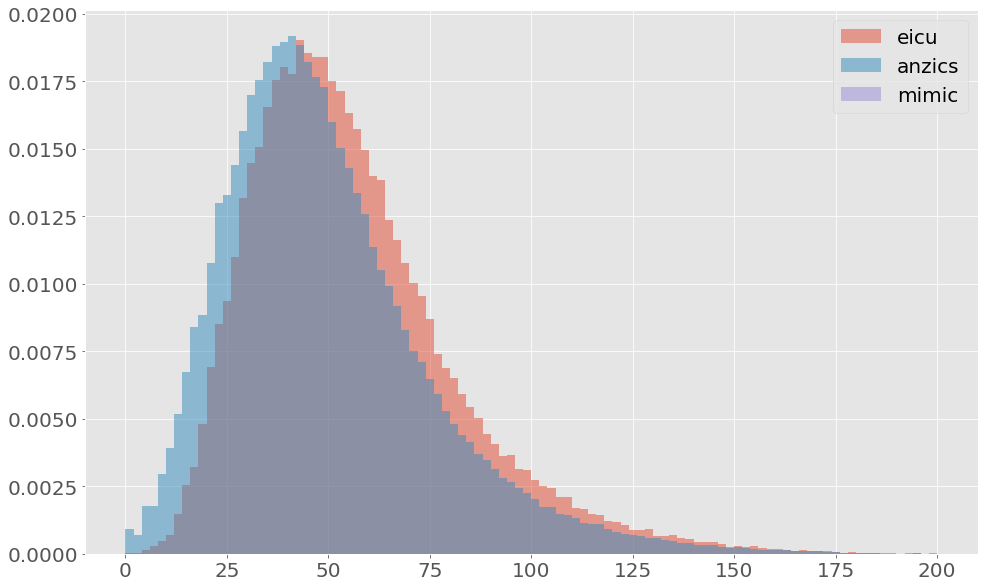

In [54]:
bins = np.linspace(0, 200, 101)
plt.figure(figsize=[16,10])
plt.rcParams.update({'font.size': 20})
plt.hist(df.loc[df['data_source']=='eicu','apache_3j_score'].dropna().values, bins,
         normed=True, alpha=0.5, label='eicu')
plt.hist(df.loc[df['data_source']=='anzics','apache_3j_score'].dropna().values, bins,
         normed=True, alpha=0.5, label='anzics')
plt.hist(df.loc[df['data_source']=='mimic','apache_3j_score'].dropna().values, bins,
         normed=True, alpha=0.5, label='mimic')
plt.legend(loc='upper right')
plt.show()

Note that we don't have any data for MIMIC for the APACHE-III score.

In [92]:
#hospital_los_days has '#REF!' under orchestra
cont = ['age','bmi','height','icu_los_days','pre_icu_los_days','weight',
       'albumin_apache','arf_apache','bilirubin_apache','bun_apache','creatinine_apache','fio2_apache','glucose_apache',
       'heart_rate_apache','hematocrit_apache','map_apache','paco2_apache','paco2_for_ph_apache','pao2_apache', 'ph_apache',
       'resprate_apache','sodium_apache','temp_apache','urineoutput_apache','wbc_apache','d1_diasbp_invasive_max',
       'd1_diasbp_invasive_min','d1_diasbp_max','d1_diasbp_min','d1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min',
       'd1_heartrate_max','d1_heartrate_min','d1_mbp_invasive_max','d1_mbp_invasive_min','d1_mbp_max','d1_mbp_min',
       'd1_mbp_noninvasive_max','d1_mbp_noninvasive_min','d1_resprate_max','d1_resprate_min','d1_spo2_max','d1_spo2_min',
       'd1_sysbp_invasive_max','d1_sysbp_invasive_min','d1_sysbp_max','d1_sysbp_min','d1_sysbp_noninvasive_max',
       'd1_sysbp_noninvasive_min','d1_temp_max','d1_temp_min','h1_diasbp_invasive_max','h1_diasbp_invasive_min',
       'h1_diasbp_max','h1_diasbp_min','h1_diasbp_noninvasive_max','h1_diasbp_noninvasive_min','h1_heartrate_max',
       'h1_heartrate_min','h1_mbp_invasive_max','h1_mbp_invasive_min','h1_mbp_max','h1_mbp_min','h1_mbp_noninvasive_max',
       'h1_mbp_noninvasive_min','h1_resprate_max','h1_resprate_min','h1_spo2_max','h1_spo2_min','h1_sysbp_invasive_max',
       'h1_sysbp_invasive_min','h1_sysbp_max','h1_sysbp_min','h1_sysbp_noninvasive_max','h1_sysbp_noninvasive_min',
       'h1_temp_max','h1_temp_min','d1_albumin_max','d1_albumin_min','d1_bilirubin_max','d1_bilirubin_min','d1_bun_max',
       'd1_bun_min','d1_calcium_max','d1_calcium_min','d1_creatinine_max','d1_creatinine_min','d1_glucose_max','d1_glucose_min',
       'd1_hco3_max','d1_hco3_min','d1_hemaglobin_max','d1_hemaglobin_min','d1_hematocrit_max','d1_hematocrit_min',
       'd1_inr_max','d1_inr_min','d1_lactate_max','d1_lactate_min','d1_platelets_max','d1_platelets_min','d1_potassium_max',
       'd1_potassium_min','d1_sodium_max','d1_sodium_min','d1_wbc_max','d1_wbc_min','h1_albumin_max','h1_albumin_min',
       'h1_bilirubin_max','h1_bilirubin_min','h1_bun_max','h1_bun_min','h1_calcium_max','h1_calcium_min','h1_creatinine_max',
       'h1_creatinine_min','h1_glucose_max','h1_glucose_min','h1_hco3_max','h1_hco3_min','h1_hemaglobin_max','h1_hemaglobin_min',
       'h1_hematocrit_max','h1_hematocrit_min','h1_inr_max','h1_inr_min','h1_lactate_max','h1_lactate_min','h1_platelets_max',
       'h1_platelets_min','h1_potassium_max','h1_potassium_min','h1_sodium_max','h1_sodium_min','h1_wbc_max','h1_wbc_min',
       'd1_arterial_pco2_max','d1_arterial_pco2_min','d1_arterial_ph_max','d1_arterial_ph_min','d1_arterial_po2_max',
       'd1_arterial_po2_min','d1_pao2fio2ratio_min','h1_arterial_pco2_max','h1_arterial_pco2_min','h1_arterial_ph_max',
        'h1_arterial_ph_min','h1_arterial_po2_max','h1_arterial_po2_min','h1_pao2fio2ratio_max','h1_pao2fio2ratio_min',
       'apache_3j_score']

tb_header = ['anzics','eicu','mimic','orchestra']
d = {}
for c in cont:
    
    avg_a = np.mean(df.loc[df['data_source']=='anzics',c].dropna().values)
    avg_e = np.mean(df.loc[df['data_source']=='eicu',c].dropna().values)
    avg_m = np.mean(df.loc[df['data_source']=='mimic',c].dropna().values)
    avg_o = np.mean(df.loc[df['data_source']=='orchestra',c].dropna().values)
    d[c+'_avg']= [avg_a, avg_e, avg_m, avg_o]
    std_a = np.std(df.loc[df['data_source']=='anzics',c].dropna().values)
    std_e = np.std(df.loc[df['data_source']=='eicu',c].dropna().values)
    std_m = np.std(df.loc[df['data_source']=='mimic',c].dropna().values)
    std_o = np.std(df.loc[df['data_source']=='orchestra',c].dropna().values)
    d[c+'_std']= [std_a, std_e, std_m, std_o]
    med_a = np.median(df.loc[df['data_source']=='anzics',c].dropna().values)
    med_e = np.median(df.loc[df['data_source']=='eicu',c].dropna().values)
    med_m = np.median(df.loc[df['data_source']=='mimic',c].dropna().values)
    med_o = np.median(df.loc[df['data_source']=='orchestra',c].dropna().values)
    d[c+'_med']= [med_a, med_e, med_m, med_o]
tb = pd.DataFrame(d, index=tb_header)
tb=tb.transpose()
display(HTML(tb.to_html().replace('NaN', '')))
        

,anzics,eicu,mimic,orchestra
age_avg,60.564660,61.970120,74.834305,62.331245
age_med,64.500000,64.000000,65.688000,65.000000
age_std,19.297719,16.759928,55.151000,19.327434
albumin_apache_avg,29.831821,0.509275,3.205178,
albumin_apache_med,30.000000,-1.000000,3.200000,
albumin_apache_std,6.482483,1.933288,0.733821,
apache_3j_score_avg,49.226547,54.796320,,
apache_3j_score_med,45.000000,51.000000,,
apache_3j_score_std,25.645590,26.129074,,
arf_apache_avg,0.048418,0.036857,,


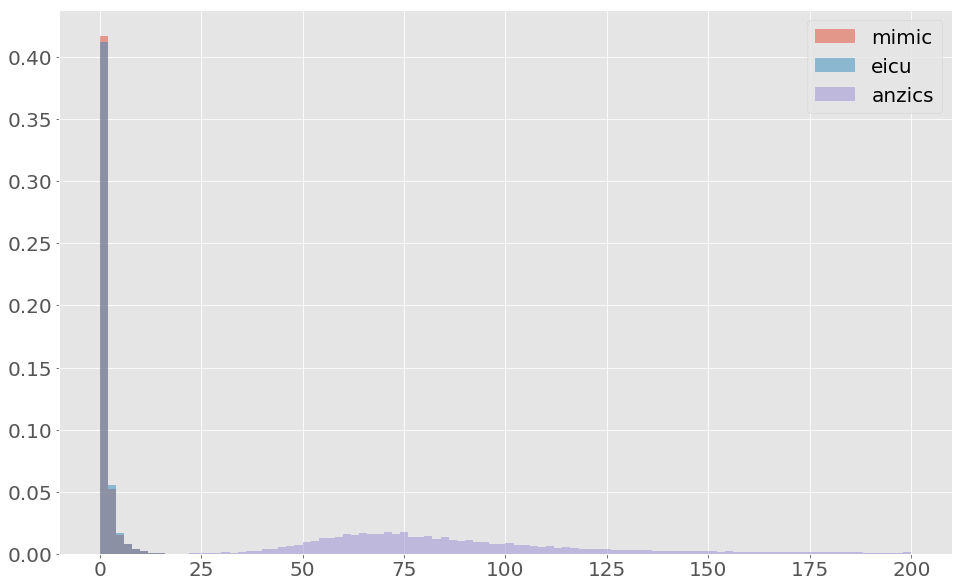

In [94]:
bins = np.linspace(0, 200, 101)
plt.figure(figsize=[16,10])
plt.hist(df.loc[df['data_source']=='mimic','d1_creatinine_max'].dropna().values, bins,
         normed=True, alpha=0.5, label='mimic')
plt.hist(df.loc[df['data_source']=='eicu','d1_creatinine_max'].dropna().values, bins,
         normed=True, alpha=0.5, label='eicu')
plt.hist(df.loc[df['data_source']=='anzics','d1_creatinine_max'].dropna().values, bins,
         normed=True, alpha=0.5, label='anzics')
plt.legend(loc='upper right')
plt.show()